In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [5]:
train = pd.read_csv('/food-delivery-dataset/train.csv')
test = pd.read_csv('/food-delivery-dataset/test.csv')

In [6]:
train[:3]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [7]:
test[:3]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian


### pre-processing

### pre-processing

1. strip the unwanted string parts

In [8]:
train['Weatherconditions'] = train['Weatherconditions'].map(lambda x: str(x)[11:])
test['Weatherconditions'] = test['Weatherconditions'].map(lambda x: str(x)[11:])

train['Time_taken(min)'] = train['Time_taken(min)'].map(lambda x: str(x)[6:])

2. convert 'NaN ' values into np.nan

In [9]:
for i in train.columns:
    train[i].loc[train[i] == 'NaN '] = np.nan
    train[i].loc[train[i] == 'NaN'] = np.nan

for j in test.columns:
    test[j].loc[test[j] == 'NaN '] = np.nan
    test[j].loc[test[j] == 'NaN'] = np.nan

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
train.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [11]:
test.isnull().sum()

ID                               0
Delivery_person_ID               0
Delivery_person_Age            491
Delivery_person_Ratings        507
Restaurant_latitude              0
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Order_Date                       0
Time_Orderd                    444
Time_Order_picked                0
Weatherconditions              158
Road_traffic_density           154
Vehicle_condition                0
Type_of_order                    0
Type_of_vehicle                  0
multiple_deliveries            238
Festival                        65
City                           324
dtype: int64

3. dealign with missign values

In [12]:
# delete missing values in Time_Orderd column
train.dropna(subset=['Time_Orderd'], axis=0, inplace=True)
test.dropna(subset=['Time_Orderd'], axis=0, inplace=True)

# fill the missing values with their forward values
train = train.fillna(method='ffill')
test = test.fillna(method='ffill')

In [13]:
train.isnull().any()

ID                             False
Delivery_person_ID             False
Delivery_person_Age            False
Delivery_person_Ratings        False
Restaurant_latitude            False
Restaurant_longitude           False
Delivery_location_latitude     False
Delivery_location_longitude    False
Order_Date                     False
Time_Orderd                    False
Time_Order_picked              False
Weatherconditions              False
Road_traffic_density           False
Vehicle_condition              False
Type_of_order                  False
Type_of_vehicle                False
multiple_deliveries            False
Festival                       False
City                           False
Time_taken(min)                False
dtype: bool

In [14]:
test.isnull().any()

ID                             False
Delivery_person_ID             False
Delivery_person_Age            False
Delivery_person_Ratings        False
Restaurant_latitude            False
Restaurant_longitude           False
Delivery_location_latitude     False
Delivery_location_longitude    False
Order_Date                     False
Time_Orderd                    False
Time_Order_picked              False
Weatherconditions              False
Road_traffic_density           False
Vehicle_condition              False
Type_of_order                  False
Type_of_vehicle                False
multiple_deliveries            False
Festival                       False
City                           False
dtype: bool

4. convert data types

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43862 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           43862 non-null  object 
 1   Delivery_person_ID           43862 non-null  object 
 2   Delivery_person_Age          43862 non-null  object 
 3   Delivery_person_Ratings      43862 non-null  object 
 4   Restaurant_latitude          43862 non-null  float64
 5   Restaurant_longitude         43862 non-null  float64
 6   Delivery_location_latitude   43862 non-null  float64
 7   Delivery_location_longitude  43862 non-null  float64
 8   Order_Date                   43862 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            43862 non-null  object 
 11  Weatherconditions            43862 non-null  object 
 12  Road_traffic_density         43862 non-null  object 
 13  Vehicle_conditio

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10955 entries, 1 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10955 non-null  object 
 1   Delivery_person_ID           10955 non-null  object 
 2   Delivery_person_Age          10955 non-null  object 
 3   Delivery_person_Ratings      10955 non-null  object 
 4   Restaurant_latitude          10955 non-null  float64
 5   Restaurant_longitude         10955 non-null  float64
 6   Delivery_location_latitude   10955 non-null  float64
 7   Delivery_location_longitude  10955 non-null  float64
 8   Order_Date                   10955 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            10955 non-null  object 
 11  Weatherconditions            10955 non-null  object 
 12  Road_traffic_density         10955 non-null  object 
 13  Vehicle_conditio

In [17]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries', 'Time_taken(min)']
features1 =  ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
for i in features:
    train[i] = train[i].astype(str).astype(float)
    for j in features1:
        test[j] = test[j].astype(str).astype(float)

5. construct new features

In [18]:
train['Ordered_Time'] = train['Order_Date'] + str(' ') + train['Time_Orderd']
train['Picked_Time'] = train['Order_Date'] + str(' ') + train['Time_Order_picked']

test['Ordered_Time'] = test['Order_Date'] + str(' ') + test['Time_Orderd']
test['Picked_Time'] = test['Order_Date'] + str(' ') + test['Time_Order_picked']

# convert into datetime format
train['Ordered_Time'] = pd.to_datetime(train['Ordered_Time'])
train['Picked_Time'] = pd.to_datetime((train['Picked_Time']))

test['Ordered_Time'] = pd.to_datetime(test['Ordered_Time'])
test['Picked_Time'] = pd.to_datetime((test['Picked_Time']))

In [19]:
train['Time_Ordered_picked'] = ((train['Picked_Time'] - train['Ordered_Time'])/pd.Timedelta(1,'min')).fillna(0).astype(int)
test['Time_Ordered_picked'] = ((test['Picked_Time'] - test['Ordered_Time'])/pd.Timedelta(1, 'min')).fillna(0).astype(int)

In [20]:
train['Time_Ordered_picked'].value_counts()

 5       14564
 10      14288
 15      14179
-1425      431
-1430      261
-1435      139
Name: Time_Ordered_picked, dtype: int64

In [21]:
test['Time_Ordered_picked'].value_counts()

 10      3591
 15      3587
 5       3575
-1425     103
-1430      62
-1435      37
Name: Time_Ordered_picked, dtype: int64

In [22]:
train['Time_Ordered_picked'].replace([-1425, -1430, -1435], [15,10,5], inplace=True)
test['Time_Ordered_picked'].replace([-1425, -1430, -1435], [15,10,5], inplace=True)

6. drop the unwanted features

In [23]:
ID = test.ID

In [24]:
train.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)
test.drop(['ID', 'Delivery_person_ID'], axis=1, inplace=True)

In [25]:
train.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_Time', 'Picked_Time'], axis=1, inplace=True)
test.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude',
            'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Ordered_Time', 'Picked_Time'], axis=1, inplace=True)

### Data viz

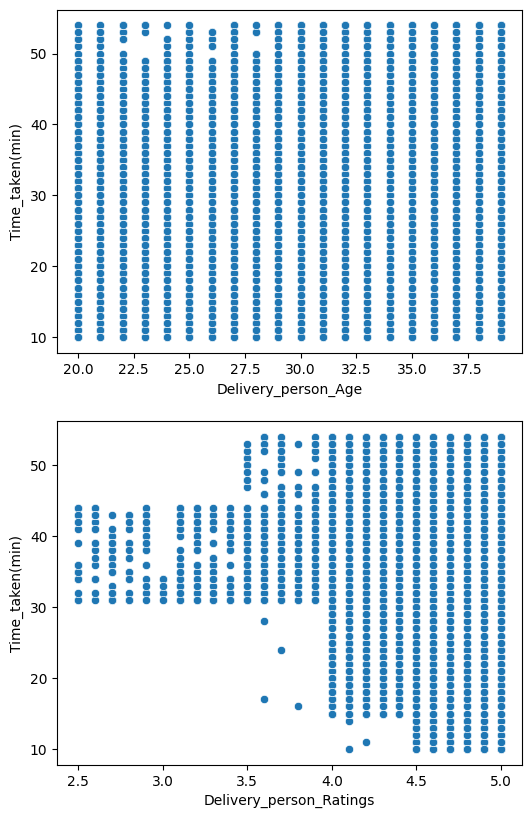

In [26]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(6,10), dpi=100)
sns.scatterplot(x='Delivery_person_Age', y='Time_taken(min)', data=train, ax=ax1)
sns.scatterplot(x='Delivery_person_Ratings', y='Time_taken(min)', data=train, ax=ax2)
plt.show()

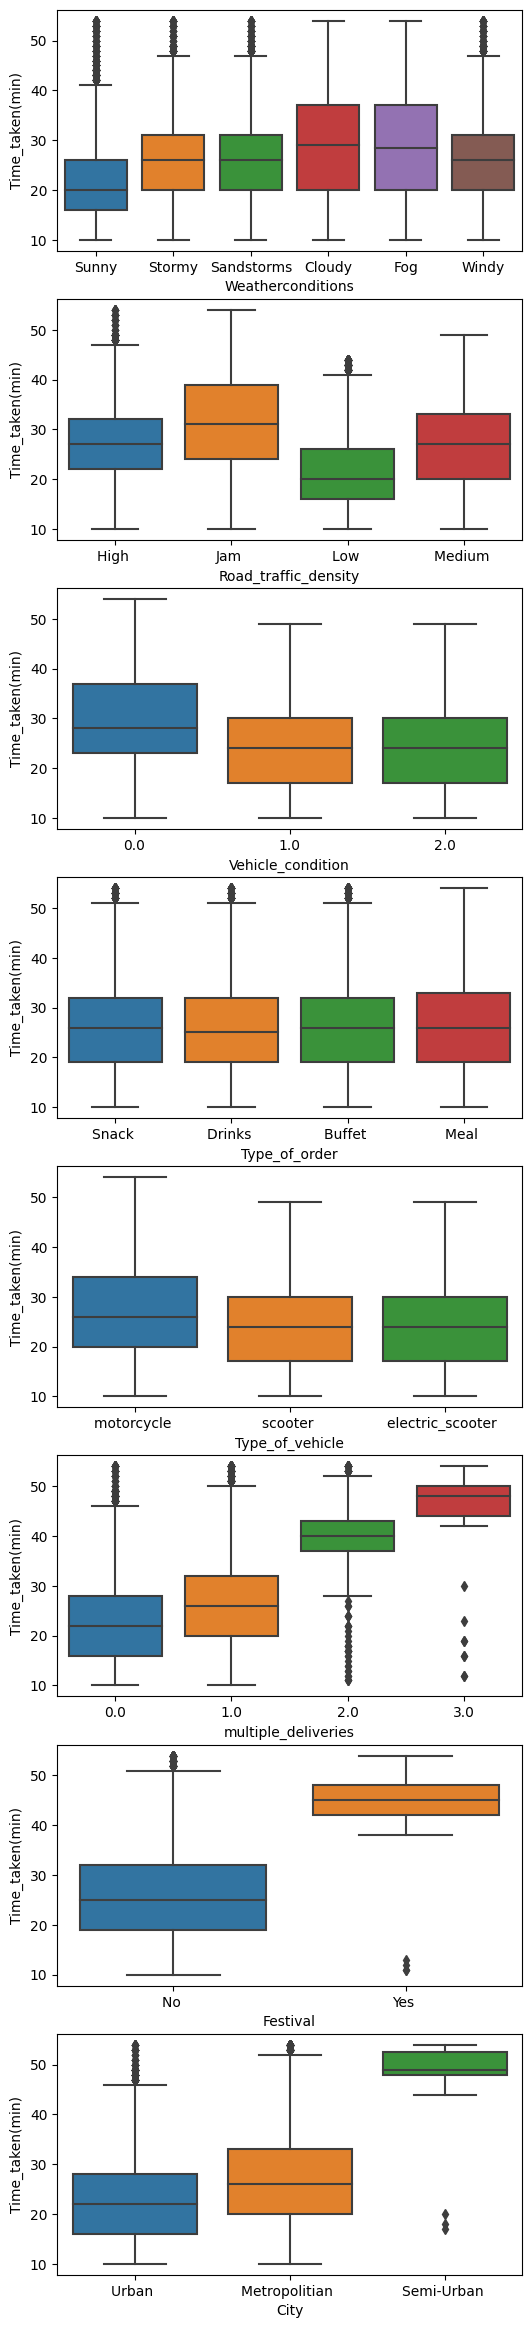

In [27]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, figsize=(6,30), dpi=100)
sns.boxplot(x='Weatherconditions', y='Time_taken(min)', data=train, ax=ax1)
sns.boxplot(x='Road_traffic_density', y='Time_taken(min)', data=train, ax=ax2)
sns.boxplot(x='Vehicle_condition', y='Time_taken(min)', data=train, ax=ax3)
sns.boxplot(x='Type_of_order', y='Time_taken(min)', data=train, ax=ax4)
sns.boxplot(x='Type_of_vehicle', y='Time_taken(min)', data=train, ax=ax5)
sns.boxplot(x='multiple_deliveries', y='Time_taken(min)', data=train, ax=ax6)
sns.boxplot(x='Festival', y='Time_taken(min)', data=train, ax=ax7)
sns.boxplot(x='City', y='Time_taken(min)', data=train, ax=ax8)
plt.show()

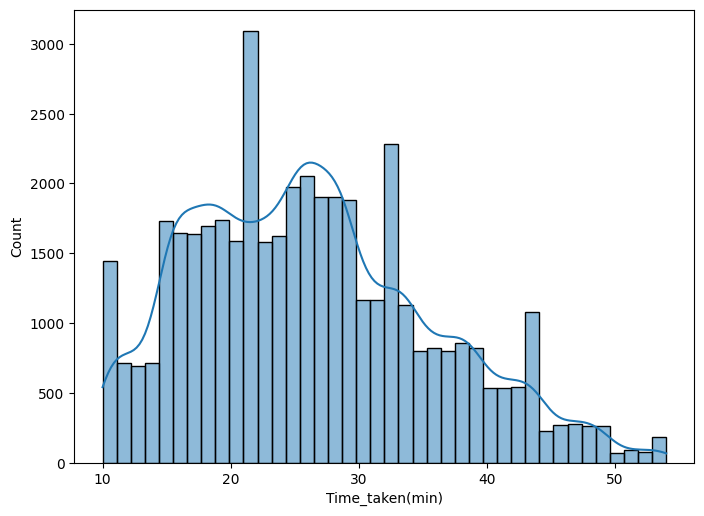

In [28]:
plt.figure(figsize=(8,6), dpi=100)
sns.histplot(train['Time_taken(min)'], bins=40, kde=True)
plt.show()

### label encodign and train test sets splitting

In [29]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [30]:
x = train.drop('Time_taken(min)', axis=1)
y = train['Time_taken(min)']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

### modeling

In [31]:
rf = RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=123).fit(x_train, y_train)
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.1,alpha=0.1,seed=123).fit(x_train, y_train)

In [32]:
rf_pred = rf.predict(x_test)
xgb_pred = xgb.predict(x_test)

In [33]:
def rmse(pred, title):
    mse = metrics.mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    print('RMSE of '+ title +str(':'))
    print(np.round(rmse,3))

In [34]:
def r2(pred, title):
    r2 = metrics.r2_score(pred, y_test)
    print('R2 of ' + title + str(':'))
    print(r2)

In [35]:
def plot(pred, title):
    plt.figure(figsize=(10,8))
    plt.plot([i for i in range(len(y_test))], y_test, label='actual values')
    plt.plot([i for i in range(len(y_test))], pred, label='actual values')
    plt.title(title)
    plt.legend()
    plt.show()

In [36]:
def plot_learning_curve(estimator, title, x, y, ylim=None, cv=None,
                         n_jobs=1, train_sizes=np.linspace(0.1,1,5)):
    plt.figure(figsize=(12,12))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('training examples')
    plt.ylabel('Score')

    train_sizes, train_score, test_score = learning_curve(estimator, x, y, cv=cv, n_jobs=n_jobs,                                                      train_sizes=train_sizes)
    train_score_mean = np.mean(train_score, 1)
    test_score_mean = np.mean(test_score, 1)
    train_score_std = np.std(train_score, 1)
    test_score_std = np.std(test_score, 1)
    plt.grid()

    plt.fill_between(train_sizes, train_score_mean-train_score_std,
                     train_score_mean+train_score_std, alpha=0.5, color='r')
    plt.fill_between(train_sizes, test_score_mean-test_score_std,
                     test_score_mean+test_score_std, alpha=0.5, color='g')
    plt.plot(train_sizes, train_score_mean, 'rs--', label='Training Score')
    plt.plot(train_sizes, test_score_mean, 'go-', label='Cross Validation Score')

    plt.legend(loc='lower right')
    plt.show()

In [37]:
rmse(rf_pred, 'RandomForestRegressor')

RMSE of RandomForestRegressor:
4.937


In [38]:
rmse(xgb_pred, 'XGBRegressor')

RMSE of XGBRegressor:
5.098


In [39]:
r2(rf_pred, 'RandomForestRegressor')

R2 of RandomForestRegressor:
0.6104024077194153


In [40]:
r2(xgb_pred, 'XGBRegressor')

R2 of XGBRegressor:
0.6117815451211901


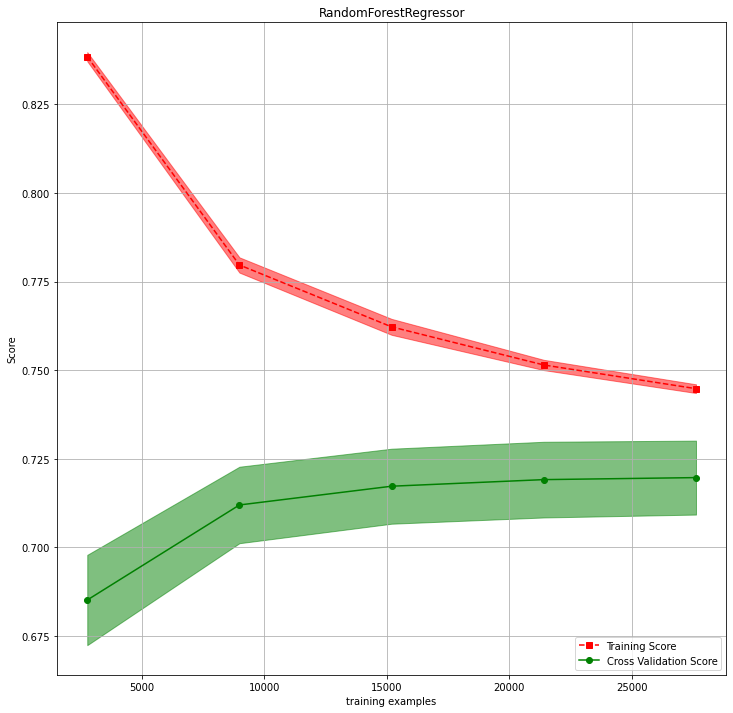

In [41]:
plot_learning_curve(rf, 'RandomForestRegressor', x_train, y_train, cv=10, n_jobs=-1)

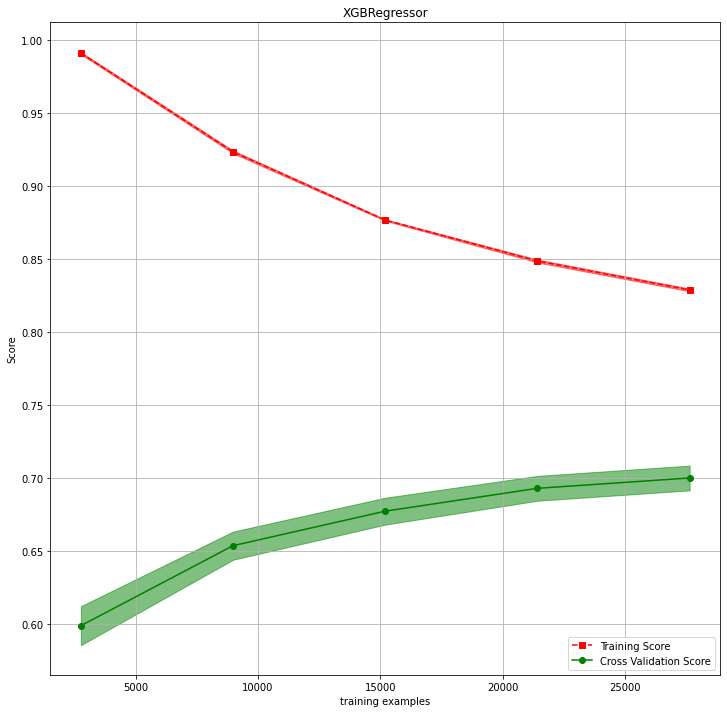

In [42]:
plot_learning_curve(xgb, 'XGBRegressor', x_train, y_train, cv=10, n_jobs=-1)

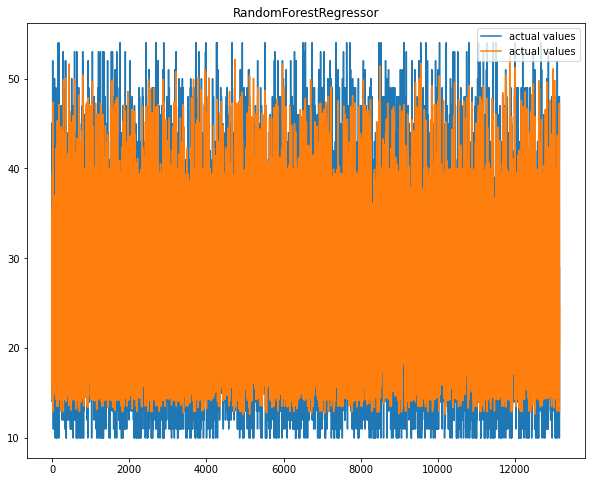

In [43]:
plot(rf_pred, 'RandomForestRegressor')

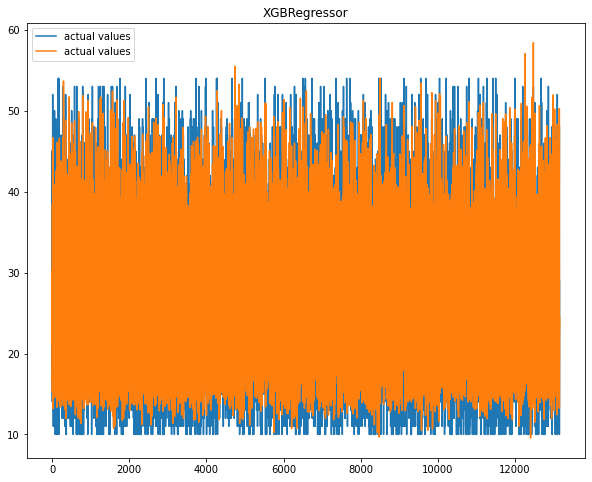

In [44]:
plot(xgb_pred, 'XGBRegressor')

### deploy on test df

In [45]:
pred_result = np.round(xgb.predict(test))
result = pd.DataFrame({'ID':ID, 'Time_taken': pred_result})
result

,ID,Time_taken
1,0x3474,29.0
2,0x9420,28.0
3,0x72ee,24.0
4,0xa759,22.0
5,0xc4af,21.0
...,...,...
11393,0xe240,23.0
11394,0x6909,22.0
11395,0x443b,29.0
11397,0x22d4,22.0
